In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [4]:
# Load the dataset
file_path = '../data/owid-covid-data.csv'
data = pd.read_csv(file_path, parse_dates=True)
data = data[['date', 'new_deaths']]

data.set_index('date', inplace=True)
data = data.groupby('date').sum().reset_index()



In [5]:
from statsmodels.tsa.stattools import adfuller
data = data.dropna()
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(data['new_deaths'])

1. ADF :  -2.1640704026634534
2. P-Value :  0.21954320991503407
3. Num Of Lags :  17
4. Num Of Observations Used For ADF Regression: 1348
5. Critical Values :
	 1% :  -3.435210382964628
	 5% :  -2.8636864858936333
	 10% :  -2.5679127921571907


In [6]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(data['new_deaths'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=29138.397, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30173.460, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=29819.963, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=29311.010, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=30171.461, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=29256.175, Time=0.89 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=29286.441, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=29054.411, Time=1.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=29265.228, Time=0.19 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=29018.616, Time=0.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=29167.831, Time=0.44 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=28997.290, Time=1.35 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=28822.459, Time=1.50 sec
 ARIMA(5,1,2)(0,0,0)[0] i

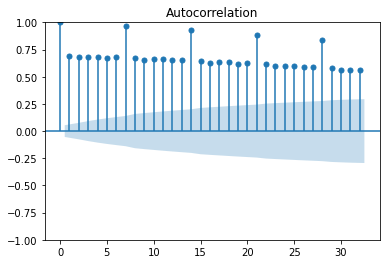

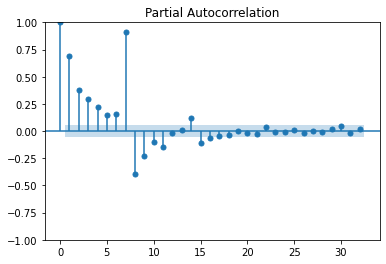

In [7]:
# Plot ACF and PACF for ARIMA order identification
train = data[['new_deaths']].iloc[:-60]
test = data[['new_deaths']].iloc[-60:]
plot_acf(train)
plt.show()

plot_pacf(train)
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['new_deaths'],order=(5,1,5))
model=model.fit()
model.summary()

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                 1306
Model:                 ARIMA(5, 1, 5)   Log Likelihood              -13640.348
Date:                Tue, 03 Oct 2023   AIC                          27302.697
Time:                        19:40:50   BIC                          27359.610
Sample:                             0   HQIC                         27324.047
                               - 1306                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0555      0.082      0.674      0.500      -0.106       0.217
ar.L2         -0.8425      0.076    -11.155      0.000      -0.991      -0.694
ar.L3         -0.2717      0.122     -2.231      0.026      -0.510      -0.033
ar.L4         -0.3856      0.074     -5.239      0.000      -0.530      -0.241
ar.L5         -0.7265      0.081     -8.984      0.000      -0.885      -0.568
ma.L1         -1.3471      0.095    -14.150      0.000      -1.534      -1.160
ma.L2          1.6439      0.165      9.989      0.000       1.321       1.966
ma.L3         -1.3439      0.188     -7.146      0.000      -1.712      -0.975
ma.L4          0.9810      0.127      7.737      0.000       0.732       1.229
ma.L5         -0.3564      0.087     -4.108      0.000      -0.526      -0.186
sigma2      1.472e+08   3.07e-09   4.79e+16      0.000    1.47e+08    1.47e+08
===================================================================================
Ljung-Box (L1) (Q):                  15.49   Jarque-Bera (JB):              8434.07
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             1.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.42e+32. Standard errors may be unstable.
"""

c:\Users\ambro\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

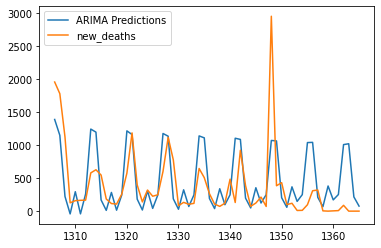

In [9]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['new_deaths'].plot(legend=True)

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['new_deaths'].mean()
rmse=sqrt(mean_squared_error(pred,test['new_deaths']))
print(rmse)

475.11510430467894
